In [1]:
#import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
import glob
import os

dfm = None
df_tmp = None
for dname in glob.glob("data/extract_dhdl/*"):
    #print(dname,os.path.basename(dname))
    fsize = os.path.basename(dname)
    for fcnt in range(100,1100,100):
        fname = "{}/dhdl_comparison_{}.log".format(dname, fcnt)
        df = pd.read_csv(fname,header=None, names=['func','fname','midx','start_time','end_time'])
        df['fcnt'] = fcnt
        df['fsize'] = fsize
        df['diff'] = df['end_time'] - df['start_time']
        dfm = pd.concat([df,dfm], ignore_index=True)

Text(0.5,1,u'Distribution of the parsing functions')

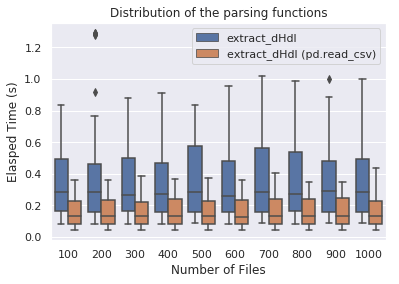

In [65]:
fix, axs = plt.subplots()
sns.boxplot(x="fcnt", y="diff", hue="func", data=dfm[(dfm.func!='read')], ax=axs)
handles, _ = axs.get_legend_handles_labels()
plt.legend(handles,['extract_dHdl', 'extract_dHdl (pd.read_csv)'])
axs.set_xlabel('Number of Files')
axs.set_ylabel('Elasped Time (s)')
axs.set_title('Distribution of the parsing functions')

Text(0.5,1,u'Distribution of the parsing functions')

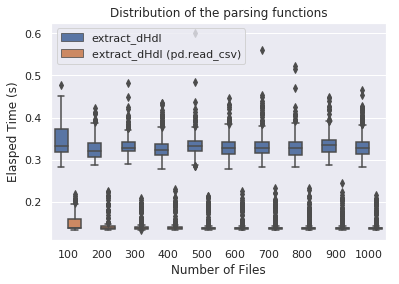

In [60]:
fix, axs = plt.subplots()
sns.boxplot(x="fcnt", y="diff", hue="func", data=dfm[(dfm.func!='read') & (dfm.fsize=='16mb')], ax=axs)
handles, _ = axs.get_legend_handles_labels()
plt.legend(handles,['extract_dHdl', 'extract_dHdl (pd.read_csv)'])
axs.set_xlabel('Number of Files')
axs.set_ylabel('Elasped Time (s)')
axs.set_title('Distribution of the parsing functions')

In [82]:
dfm[dfm.func=='extract_dHdl']['diff'].median(), dfm[dfm.func=='extract_dHdl_v3']['diff'].median(),  dfm[dfm.func=='extract_dHdl_v3']['diff'].median()/dfm[dfm.func=='extract_dHdl']['diff'].median()

(0.282384991645813, 0.13384711742401123, 0.4739880708387351)

In [84]:
dfm[dfm.func=='extract_dHdl']['diff'].median() * 0.47

0.1327209460735321

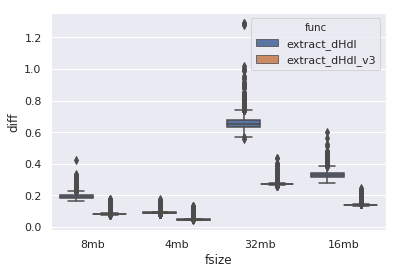

In [59]:
ax = sns.boxplot(x="fsize", y="diff", hue="func",
                     data=dfm[(dfm.func!='read')])

In [24]:
dfmm = None
for s in [4,8,16,32]:
    dfm_tmp=dfm[dfm.fsize=='{}mb'.format(s)].assign(fsize_int=s)
    dfmm = pd.concat([dfm_tmp,dfmm],ignore_index=True)

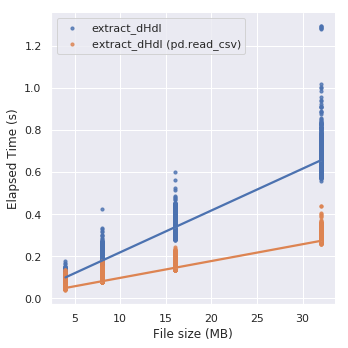

In [66]:
#dfm[dfm.func!='read'].groupby('func').plot.bar(x='fsize',y='diff')
#sns.set()

g = sns.lmplot(x="fsize_int", y="diff", hue="func",
               truncate=True, height=5, data=dfmm[(dfmm.func!='read')], legend=False, scatter_kws={"s": 10})
#               truncate=True, height=5, data=dfmm[(dfmm.func!='read') &(dfmm.fcnt==100)], legend=False)
ax=g.axes[0,0]
ax.set_xlabel('File size (MB)')
ax.set_ylabel('Elapsed Time (s)')
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles,['extract_dHdl', 'extract_dHdl (pd.read_csv)'])

In [36]:
dfm[dfm.func=='extract_dHdl'].groupby('fsize')['diff'].median()

fsize
16mb    0.328689
32mb    0.653412
4mb     0.090590
8mb     0.189629
Name: diff, dtype: float64

In [37]:
dfm[dfm.func=='extract_dHdl_v3'].groupby('fsize')['diff'].median()

fsize
16mb    0.137743
32mb    0.271224
4mb     0.046451
8mb     0.081816
Name: diff, dtype: float64

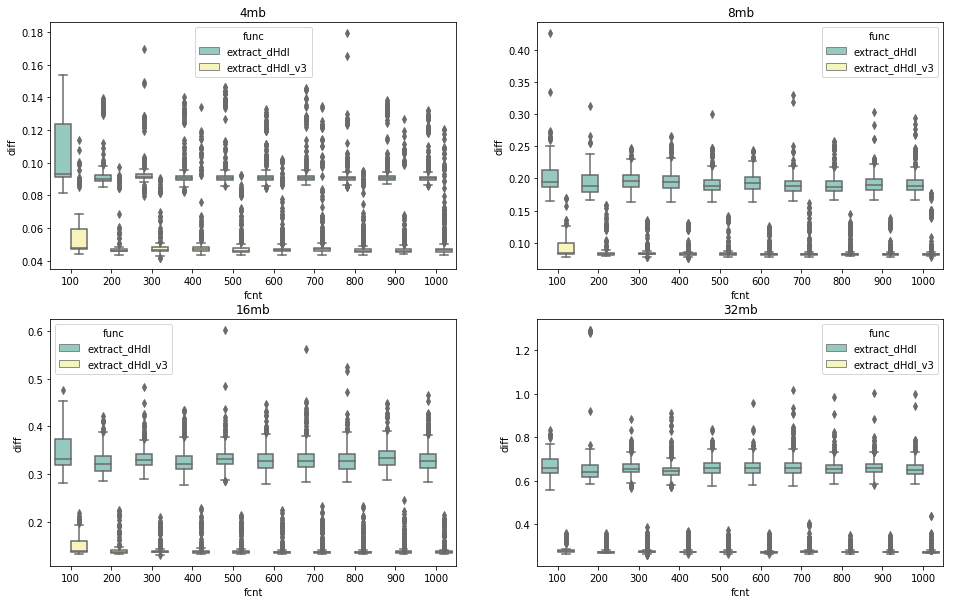

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)
row = col = 0
for size in ['4mb','8mb','16mb','32mb']:
    ax = sns.boxplot(x="fcnt", y="diff", hue="func",
                     data=dfm[(dfm.func!='read') & (dfm.fsize==size)], palette="Set3",ax=axes[row][col])
    axes[row][col].set_title(size)
    col += 1
    if col == 2:
        col = 0
        row += 1
        

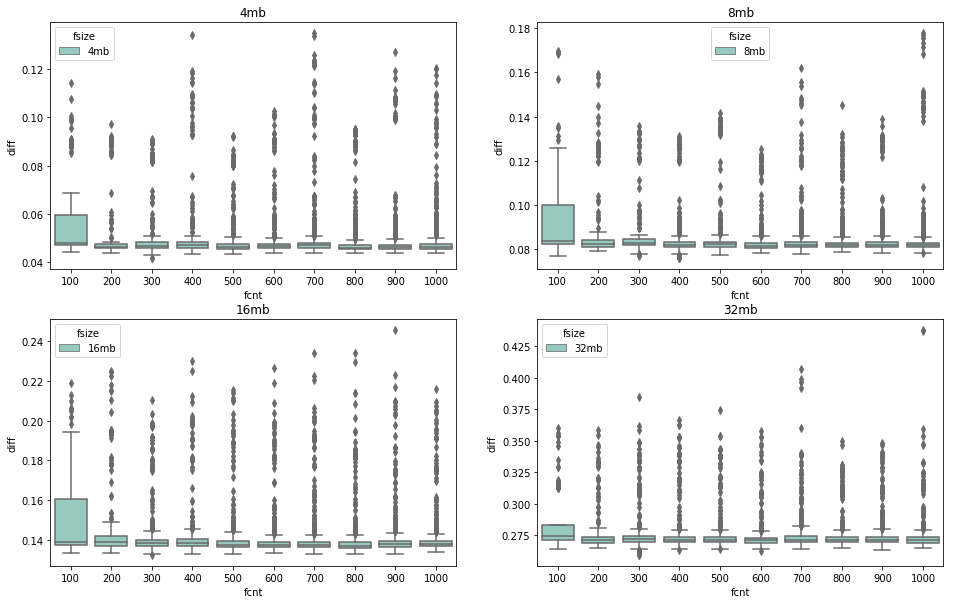

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)
row = col = 0
for size in ['4mb','8mb','16mb','32mb']:

    ax = sns.boxplot(x="fcnt", y="diff", hue="fsize",
                  data=dfm[(dfm.func=='extract_dHdl_v3') & (dfm.fsize==size)], palette="Set3",ax=axes[row][col])
    axes[row][col].set_title(size)
    col += 1
    if col == 2:
        col = 0
        row += 1

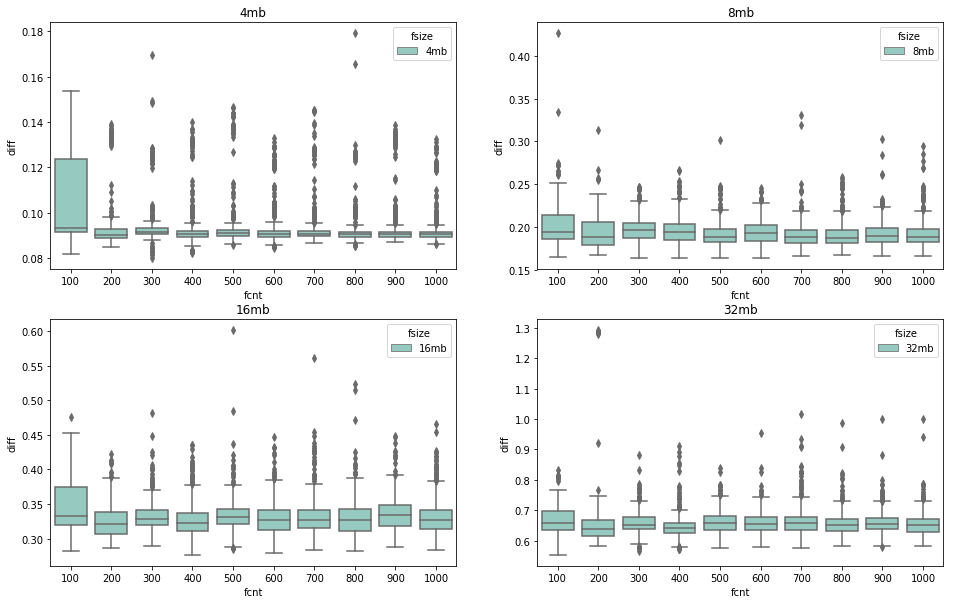

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)
row = col = 0
for size in ['4mb','8mb','16mb','32mb']:

    ax = sns.boxplot(x="fcnt", y="diff", hue="fsize",
                  data=dfm[(dfm.func=='extract_dHdl') & (dfm.fsize==size)], palette="Set3",ax=axes[row][col])
    axes[row][col].set_title(size)
    col += 1
    if col == 2:
        col = 0
        row += 1

In [17]:
dfm['fsize'].unique()

array(['8mb', '4mb'], dtype=object)

In [2]:
import glob
import os

dfm = None
df_tmp = None
for node in glob.glob("data/scaling/*"):
    #print(dname,os.path.basename(dname))
    for fcnt in glob.glob(format(node)+"/*"):
        #print(node)
        for fname in glob.glob(fcnt+"/*"):
            df = pd.read_csv(fname,header=None, names=['func','fname','midx','start_time','end_time'])
            df['ncnt'] = os.path.basename(node)
            df['fcnt'] = os.path.basename(fcnt)
            df['elapsed'] = df['end_time'] - df['start_time']
            dfm = pd.concat([df,dfm], ignore_index=True)

In [54]:
fcntl=(dfm[dfm.func!='read'].fcnt.unique())
nodel=(dfm[dfm.func!='read'].ncnt.unique())
dfmm = dfm[dfm.func!='read']
dfmm.fcnt=pd.to_numeric(dfmm.fcnt)
df_extract=[]
for i in sorted(nodel):
    for j in sorted(fcntl.astype(int)):
        tmp = dfmm[(dfmm.ncnt==i) & (dfmm.fcnt==j) & (dfmm.func=='extract_dHdl_v3')]
        tmp2 = dfmm[(dfmm.ncnt==i) & (dfmm.fcnt==j) & (dfmm.func=='extract_dHdl')]        
        #print("{},{},{},{}".format(i,j,tmp.elapsed.sum(),tmp2.elapsed.sum()))
        #tmp = [int(i[0]),j,'tot_of_extract_dHdl_v3',tmp.elapsed.sum()/int(i[0])]
        #df_extract.append(tmp)
        #print(tmp)
        tmp = [int(i[0]),j,tmp2.elapsed.sum()/int(i[0]), tmp.elapsed.sum()/int(i[0])]
        df_extract.append(tmp)
        #print(tmp)
dfe = pd.DataFrame(df_extract,columns=['ncnt','fcnt','extract_dHdl', 'extract_dHdl_v3'])        

In [33]:
dfe.ncnt=pd.to_numeric(dfe.ncnt)
dfe.fcnt=pd.to_numeric(dfe.fcnt)
dfe.elapsed_sec=pd.to_numeric(dfe.elapsed_sec)

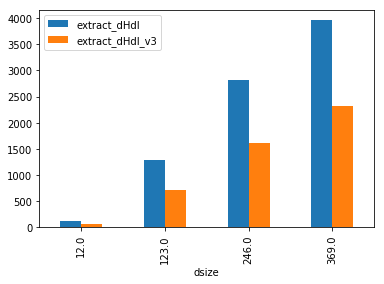

In [82]:
dfe['dsize'] = (dfe['fcnt']*32/1000.0).round()
dfe[dfe.ncnt==1].plot.bar(x='dsize',y=['extract_dHdl','extract_dHdl_v3'])
#fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)

#grouped=dfe.groupby('ncnt')
#.plot.bar(x='dsize',y=['extract_dHdl','extract_dHdl_v3'])#dfe.groupby('ncnt').plot.bar(x='dsize',y='elapsed_sec')
#grouped.groups.keys()#get_keys()

In [3]:
import glob
import os
import math

dfm = None
df_tmp = None
node = '1node'
for fpath in glob.glob("data/fsizes/{}/*".format(node)):
    fname = os.path.basename(fpath)
    lidx, dsize, fsize = fname.rsplit(".",1)[0].split('_')[2:]
    dsize = float(dsize)
    fsize = float(fsize)
    print(dsize,fsize)
    if fsize != 32.0:
        continue
    df = pd.read_csv(fpath,header=None, names=['func','fname','midx','start_time','end_time'])
    df['ncnt'] = node
    df['fcnt'] = math.ceil(dsize * 1000 / fsize)
    df['elapsed_sum'] = df['end_time'] - df['start_time']
    #df['elapsed'] = df['end_time'].max() - df['start_time'].min()
    df['dsize'] = dsize
    df['fsize'] = fsize
    dfm = pd.concat([df,dfm], ignore_index=True)
    #break

(600.0, 32.0)
(600.0, 8.0)
(2000.0, 16.0)
(800.0, 32.0)
(200.0, 32.0)
(1600.0, 16.0)
(800.0, 4.0)
(600.0, 4.0)
(2000.0, 4.0)
(1600.0, 4.0)
(2000.0, 8.0)
(1000.0, 8.0)
(400.0, 8.0)
(600.0, 16.0)
(200.0, 16.0)
(1000.0, 4.0)
(400.0, 4.0)
(200.0, 32.0)
(1600.0, 32.0)
(800.0, 8.0)
(400.0, 16.0)
(800.0, 16.0)
(200.0, 4.0)
(1000.0, 32.0)
(1200.0, 4.0)
(200.0, 8.0)
(1200.0, 32.0)
(400.0, 32.0)
(1600.0, 8.0)
(1000.0, 16.0)
(1200.0, 16.0)
(2000.0, 32.0)
(1200.0, 8.0)


In [4]:
fcntl=(dfm[dfm.func!='read'].fcnt.unique())
nodel=(dfm[dfm.func!='read'].ncnt.unique())
dfmm = dfm[dfm.func!='read']
dfmm.fcnt=pd.to_numeric(dfmm.fcnt)
df_extract=[]
for i in sorted(nodel):
    for j in sorted(fcntl.astype(int)):
        tmp = dfmm[(dfmm.ncnt==i) & (dfmm.fcnt==j) & (dfmm.func=='extract_dHdl_v3')]
        tmp2 = dfmm[(dfmm.ncnt==i) & (dfmm.fcnt==j) & (dfmm.func=='extract_dHdl')]        
        #print("{},{},{},{}".format(i,j,tmp.elapsed.sum(),tmp2.elapsed.sum()))
        #tmp = [int(i[0]),j,'tot_of_extract_dHdl_v3',tmp.elapsed.sum()/int(i[0])]
        #df_extract.append(tmp)
        #print(tmp)
        tmp = [int(i[0]), tmp2.dsize.unique()[0], j, 
               tmp2.elapsed_sum.sum()/int(i[0]),
               tmp.elapsed_sum.sum()/int(i[0]),
               (tmp2.end_time.max() - tmp2.start_time.min()),
               (tmp.end_time.max() - tmp.start_time.min())]
        df_extract.append(tmp)
        #print(tmp)
dfe = pd.DataFrame(df_extract,columns=['ncnt','dsize','fcnt','sum_extract_dHdl', 'sum_extract_dHdl_v3',
                                       'elapsed_extract_dHdl','elapsed_extract_dHdl_v3'])

/opt/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [5]:
df_read=[]
for i in sorted(nodel):
    for j in sorted(fcntl.astype(int)):
        tmp = dfm[(dfm.ncnt==i) & (dfm.fcnt==j) & (dfm.func=='read')]
        tmp = [int(i[0]), tmp.dsize.unique()[0], j, 
               tmp.elapsed_sum.sum()/int(i[0]),
               (tmp.end_time.max() - tmp.start_time.min())]
        df_read.append(tmp)

In [6]:
df_read

[[1, 200.0, 6250, 6874.319996595383, 3678.0499999523163],
 [1, 400.0, 12500, 7140.539973974228, 87.05999994277954],
 [1, 600.0, 18750, 11233.709988594055, 134.35999989509583],
 [1, 800.0, 25000, 15222.540006637573, 181.89000010490417],
 [1, 1000.0, 31250, 18903.580003023148, 226.88000011444092],
 [1, 1200.0, 37500, 22807.019963026047, 266.75999999046326],
 [1, 1600.0, 50000, 24831.42002105713, 292.47000002861023],
 [1, 2000.0, 62500, 29524.78998351097, 340.710000038147]]

In [15]:
2000 / 340.

5.882352941176471

In [16]:
400 / 87.

4.597701149425287

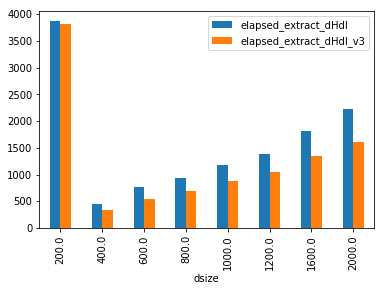

In [7]:
#dfe['dsize'] = (dfe['fcnt']*32/1000.0).round()
dfe[(dfe.ncnt==1)].plot.bar(x='dsize',y=['elapsed_extract_dHdl','elapsed_extract_dHdl_v3'])

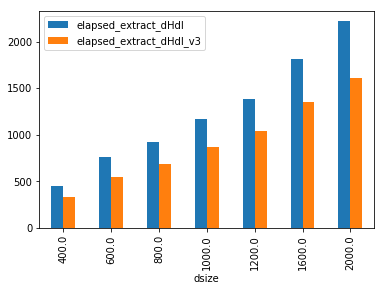

In [8]:
dfe[(dfe.ncnt==1) & (dfe.dsize != 200)].plot.bar(x='dsize',y=['elapsed_extract_dHdl','elapsed_extract_dHdl_v3'])

In [9]:
dfee = dfe.copy()


### 1 NODE

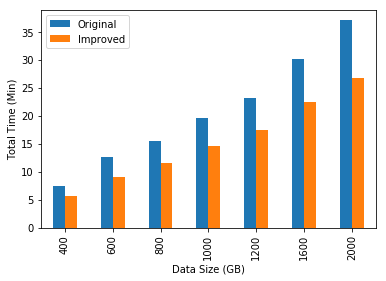

In [10]:
fix, axs = plt.subplots()
dfee.dsize = dfe.dsize.astype(int)
dfee.elapsed_extract_dHdl = dfe.elapsed_extract_dHdl / 60
dfee.elapsed_extract_dHdl_v3 = dfe.elapsed_extract_dHdl_v3 / 60
dfee[(dfee.ncnt==1) & (dfee.dsize != 200)].plot.bar(x='dsize',y=['elapsed_extract_dHdl','elapsed_extract_dHdl_v3'],ax=axs)
axs.set_xlabel('Data Size (GB)')
axs.set_ylabel('Total Time (Min)')
handles, _ = axs.get_legend_handles_labels()
plt.legend(handles,['Original', 'Improved'])

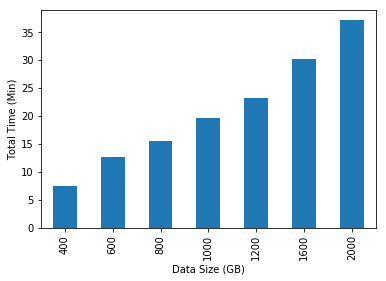

In [11]:
fix, axs = plt.subplots()
dfee[(dfee.ncnt==1) & (dfee.dsize != 200)].plot.bar(x='dsize',y=['elapsed_extract_dHdl'],ax=axs)
axs.set_xlabel('Data Size (GB)')
axs.set_ylabel('Total Time (Min)')
axs.get_legend().remove()

### Next step

- scaling, N nodes
- 4, 8, 16, 32 MB file sizes
- 

In [12]:
dfe

,ncnt,dsize,fcnt,sum_extract_dHdl,sum_extract_dHdl_v3,elapsed_extract_dHdl,elapsed_extract_dHdl_v3
0,1,200.0,6250,42780.789986,32926.120006,3874.96,3818.44
1,1,400.0,12500,41554.859996,30904.620002,451.20,335.93
2,1,600.0,18750,71118.319993,50989.570004,761.94,546.46
3,1,800.0,25000,86639.419996,64111.770005,928.76,689.63
4,1,1000.0,31250,109892.920009,81611.930001,1171.04,872.00
5,1,1200.0,37500,130038.520004,98167.700007,1386.75,1045.87
6,1,1600.0,50000,169066.240005,124032.889993,1811.99,1351.93
7,1,2000.0,62500,209158.719990,146866.529988,2223.02,1610.41


In [35]:
import glob
import os
import math

dfm = None
df_tmp = None
for node in ["{}node".format(x) for x in [1,2,4,8]]:
    for fpath in glob.glob("data/fsizes/scale/{}/*".format(node)):
        fname = os.path.basename(fpath)
        lidx, dsize, fsize = fname.rsplit(".",1)[0].split('_')[2:]
        dsize = float(dsize)
        fsize = float(fsize)
        #print(dsize,fsize)
        df = pd.read_csv(fpath,header=None, names=['func','fname','midx','start_time','end_time','hostname'])
        df['ncnt'] = node
        df['fcnt'] = math.ceil(dsize * 1000 / fsize)
        df['elapsed_sum'] = df['end_time'] - df['start_time']
        #df['elapsed'] = df['end_time'].max() - df['start_time'].min()
        df['dsize'] = dsize
        df['fsize'] = fsize
        dfm = pd.concat([df,dfm], ignore_index=True)

In [26]:
dfm

,func,fname,midx,start_time,end_time,hostname,ncnt,fcnt,elapsed_sum,dsize,fsize
0,read,/scratch/06079/tg853783/perf/fsizes/32/0958/WO...,9573,1.565907e+09,1.565907e+09,c445-082.stampede2.tacc.utexas.edu,8node,1563.0,0.627578,50.0,32.0
1,read,/scratch/06079/tg853783/perf/fsizes/32/0941/WO...,9402,1.565907e+09,1.565907e+09,c445-082.stampede2.tacc.utexas.edu,8node,1563.0,0.713083,50.0,32.0
2,read,/scratch/06079/tg853783/perf/fsizes/32/0943/WO...,9426,1.565907e+09,1.565907e+09,c445-082.stampede2.tacc.utexas.edu,8node,1563.0,0.784867,50.0,32.0
3,read,/scratch/06079/tg853783/perf/fsizes/32/0976/WO...,9756,1.565907e+09,1.565907e+09,c445-082.stampede2.tacc.utexas.edu,8node,1563.0,0.596314,50.0,32.0
4,read,/scratch/06079/tg853783/perf/fsizes/32/0941/WO...,9405,1.565907e+09,1.565907e+09,c445-082.stampede2.tacc.utexas.edu,8node,1563.0,0.873402,50.0,32.0
5,read,/scratch/06079/tg853783/perf/fsizes/32/0978/WO...,9771,1.565907e+09,1.565907e+09,c445-082.stampede2.tacc.utexas.edu,8node,1563.0,0.661903,50.0,32.0
6,read,/scratch/06079/tg853783/perf/fsizes/32/0972/WO...,9714,1.565907e+09,1.565907e+09,c445-082.stampede2.tacc.utexas.edu,8node,1563.0,0.759188,50.0,32.0
7,read,/scratch/06079/tg853783/perf/fsizes/32/0942/WO...,9411,1.565907e+09,1.565907e+09,c445-082.stampede2.tacc.utexas.edu,8node,1563.0,1.054471,50.0,32.0
8,read,/scratch/06079/tg853783/perf/fsizes/32/0948/WO...,9477,1.565907e+09,1.565907e+09,c445-082.stampede2.tacc.utexas.edu,8node,1563.0,1.033076,50.0,32.0
9,read,/scratch/06079/tg853783/perf/fsizes/32/0940/WO...,9399,1.565907e+09,1.565907e+09,c445-082.stampede2.tacc.utexas.edu,8node,1563.0,1.062485,50.0,32.0


In [36]:
fcntl=(dfm[dfm.func!='read'].fcnt.unique())
nodel=(dfm[dfm.func!='read'].ncnt.unique())
dfmm = dfm[dfm.func!='read']
dfmm.fcnt=pd.to_numeric(dfmm.fcnt)
df_extract=[]
for i in sorted(nodel):
    tmp = dfmm[(dfmm.ncnt==i) & (dfmm.func=='extract_dHdl_v3')]
    tmp = [int(i[0]), 400, 
               tmp.elapsed_sum.sum()/int(i[0]),
               (tmp.end_time.max() - tmp.start_time.min())]
    df_extract.append(tmp)

dfe = pd.DataFrame(df_extract,columns=['ncnt','dsize', 'sum_extract_dHdl_v3','elapsed_extract_dHdl_v3'])

In [37]:
dfe

,ncnt,dsize,sum_extract_dHdl_v3,elapsed_extract_dHdl_v3
0,1,400,129732.804614,1003.986814
1,2,400,61254.515103,480.527439
2,4,400,30590.884758,255.148207
3,8,400,7524.461853,62.684118


In [39]:
dfee = dfe.copy()

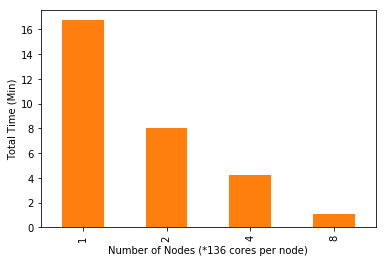

In [50]:
fix, axs = plt.subplots()
dfee.elapsed_extract_dHdl_v3 = dfe.elapsed_extract_dHdl_v3 / 60
#dfee.cores = dfe.ncnt * 136
dfee=dfee.assign(cores=dfee.ncnt*136)
dfee.plot.bar(x='ncnt',y=['elapsed_extract_dHdl_v3'],ax=axs, color='C1')
axs.set_xlabel('Number of Nodes (*136 cores per node)')
axs.set_ylabel('Total Time (Min)')
axs.get_legend().remove()